In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as c
import numpy.random as random
from neuron import Neuron, Log
from simulation import Simulator
from util import get_combinations
from util import truncate_colormap
from collections import namedtuple
from collections import OrderedDict
import pickle
import scipy.stats as stats


plt.rcParams.update({'font.size': 12})

In [19]:
neuron_parameters = OrderedDict(
    N = [10],
    S = [1],
    tau_W=[2, 20],
    beta = [1],
)

neurons = []
for p in get_combinations(neuron_parameters):
    neurons.append(Neuron(p.N, p.S, p.tau_W, p.beta))

In [20]:
env_parameters = OrderedDict(
    sigma_s = [1],
    epsilon = [0.5],
    # epsilon = [0.1],
    sigma_y = [1],
    tau_y = [150],
    # T_e = [100]
)

envs = []
for p in get_combinations(env_parameters):
    envs.append(Simulator(p.sigma_s, p.epsilon, p.sigma_y, p.tau_y, dt=0.01))

In [21]:
trials = OrderedDict(
    neuron = neurons,
    env = envs
)


T = max(env_parameters['tau_y'])
# run all the combinations available
for trial in get_combinations(trials):
    trial.env.run(trial.neuron, T=T)


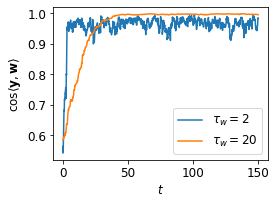

In [22]:
fig0, ax0 = plt.subplots(figsize=(4,3))
cos0 = (neurons[0].po.T[None, :, :] @ neurons[0].logs[0].W @ neurons[0].logs[0].y / np.sqrt(neurons[0].po.T[None, :, :] @ neurons[0].logs[0].W @ np.transpose(neurons[0].po.T[None, :, :] @ neurons[0].logs[0].W, (0,2,1)))).squeeze()
ax0.plot(
    neurons[0].logs[0].timeline,
    cos0,
    label = '$\\tau_w =${}'.format(neurons[0].hyper['tau_W'])
)
cos1 = (neurons[1].po.T[None, :, :] @ neurons[1].logs[0].W @ neurons[1].logs[0].y / np.sqrt(neurons[1].po.T[None, :, :] @ neurons[1].logs[0].W @ np.transpose(neurons[1].po.T[None, :, :] @ neurons[1].logs[0].W, (0,2,1)))).squeeze()
ax0.plot(
    neurons[1].logs[0].timeline,
    cos1,
    label = '$\\tau_w =${}'.format(neurons[1].hyper['tau_W'])
)
ax0.set_xlabel('$t$')
ax0.set_ylabel('$\cos\langle\mathbf{{y}},\mathbf{{w}}\\rangle$')
# ax0.set_xticks([0, 50, 100, 150])
# ax0.grid(which='major', axis='x')
ax0.legend()

fig0.tight_layout()


In [23]:
fig0.savefig("../final_figure/2.1.pdf", bbox_inches = 'tight')

In [5]:
neuron_parameters = OrderedDict(
    N = [10],
    S = [5],
    tau_W=[1],
    beta = [1],
    n = [2]
)

neurons = []
for p in get_combinations(neuron_parameters):
    neurons.append(Neuron(p.N, p.S, p.tau_W, p.beta, p.n))

In [6]:
env_parameters = OrderedDict(
    sigma_s = [1],
    epsilon = [0.1, 0.4, 1.6],
    # epsilon = [0.1],
    sigma_y = [1],
    T_e = [10, 20, 50]
    # T_e = [100]
)

envs = []
for p in get_combinations(env_parameters):
    envs.append(Simulator(p.sigma_s, p.epsilon, p.sigma_y, p.T_e, dt=0.01))

In [7]:
trials = OrderedDict(
    neuron = neurons,
    env = envs
)


T = 10 * max(env_parameters['T_e'])
# run all the combinations available
for trial in get_combinations(trials):
    trial.env.run(trial.neuron, T=T)

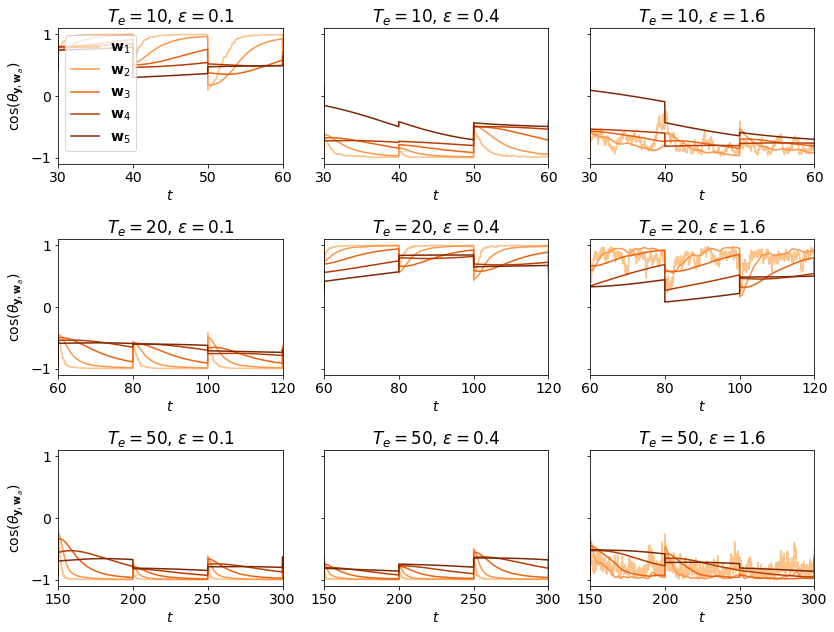

In [56]:
cm_section = np.linspace(0.3, 1, neurons[0].S)
colors = [ cm.Oranges(x) for x in cm_section ]

fig1, axs1 = plt.subplots(len(env_parameters['T_e']), len(env_parameters['epsilon']), squeeze=True, figsize=(12,9), sharey=True)

for i, T_e in enumerate(env_parameters['T_e']):
    for j, epsilon in enumerate(env_parameters['epsilon']):
        for log in neurons[0].logs:
            if log.env_parameters['T_e'] == T_e and log.env_parameters['epsilon'] == epsilon:
                for k in np.arange(0, neurons[0].S, 1):
                    axs1[i, j].plot(
                        log.timeline, 
                        (log.W[:, [k], :] @ log.y / np.sqrt(log.W[:, [k], :] @ np.transpose(log.W[:, [k], :], (0,2,1)))).squeeze(), 
                        color = colors[k],
                        label = '$\mathbf{{w}}_{{{k}}}$'.format(k=k+1)
                    )
                    axs1[i, j].set_xlabel('$t$', fontsize=14)
                    axs1[i, j].set_title('$T_e = {}$, $\epsilon = {}$'.format(T_e, epsilon))
                axs1[i, j].set_xlim(3*T_e, 6*T_e)
                if j == 0:
                    axs1[i, j].set_ylabel('$\cos(\\theta_{{\mathbf{{y}},\mathbf{{w}}_{{a}}}})$', fontsize=14)
                    if i == 0:
                        axs1[i, j].legend(loc="upper left")

fig1.tight_layout()



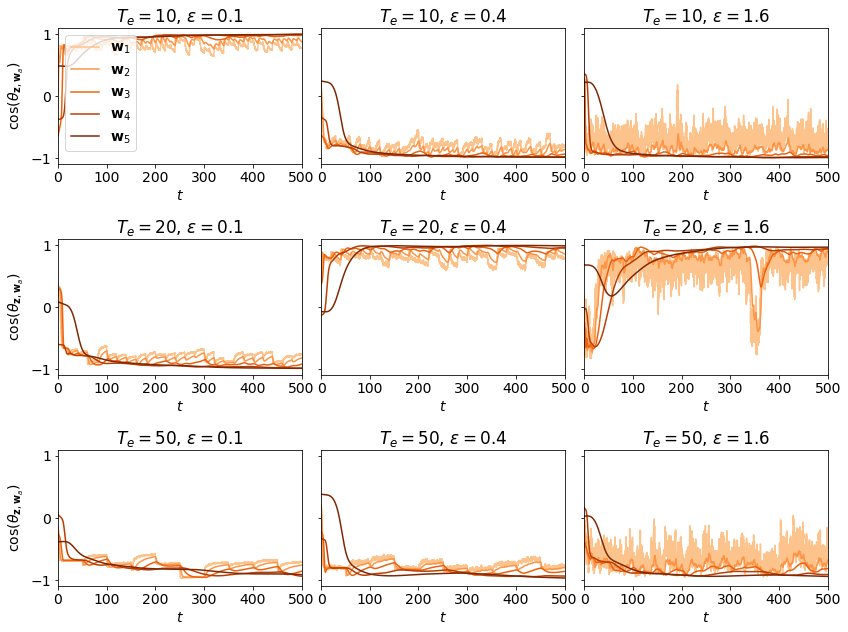

In [57]:
cm_section = np.linspace(0.3, 1, neurons[0].S)
colors = [ cm.Oranges(x) for x in cm_section ]

fig2, axs2 = plt.subplots(len(env_parameters['T_e']), len(env_parameters['epsilon']), squeeze=True, figsize=(12,9), sharey=True)

for i, T_e in enumerate(env_parameters['T_e']):
    for j, epsilon in enumerate(env_parameters['epsilon']):
        for log in neurons[0].logs:
            if log.env_parameters['T_e'] == T_e and log.env_parameters['epsilon'] == epsilon:
                for k in np.arange(0, neurons[0].S, 1):
                    axs2[i, j].plot(
                        log.timeline, 
                        (log.W[:, [k], :] @ log.z / np.sqrt(log.W[:, [k], :] @ np.transpose(log.W[:, [k], :], (0,2,1)))).squeeze(), 
                        color = colors[k],
                        label = '$\mathbf{{w}}_{{{k}}}$'.format(k=k+1)
                    )
                    axs2[i, j].set_xlabel('$t$', fontsize=14)
                    axs2[i, j].set_title('$T_e = {}$, $\epsilon = {}$'.format(T_e, epsilon))
                axs2[i, j].set_xlim(0, T)
                if j == 0:
                    axs2[i, j].set_ylabel('$\cos(\\theta_{{\mathbf{{z}},\mathbf{{w}}_{{a}}}})$', fontsize=14)
                    if i == 0:
                        axs2[i, j].legend(loc="upper left")

fig2.tight_layout()


In [58]:
# fig1.savefig('../pre_figure/y_w_pre1.pdf', bbox_inches = 'tight')
# fig2.savefig('../pre_figure/z_w_pre1.pdf', bbox_inches = 'tight')

In [59]:
neurons[0]

Properties: {'N': 10, 'S': 5, 'tau_W': 1, 'beta': 1, 'n': 2, 'alpha': 1}.
Trials: 
0: {'sigma': 1, 'epsilon': 0.1, 'T_e': 10, 'mode': 'block', 'T': 500, 'dt': 0.01}. 
1: {'sigma': 1, 'epsilon': 0.1, 'T_e': 20, 'mode': 'block', 'T': 500, 'dt': 0.01}. 
2: {'sigma': 1, 'epsilon': 0.1, 'T_e': 50, 'mode': 'block', 'T': 500, 'dt': 0.01}. 
3: {'sigma': 1, 'epsilon': 0.4, 'T_e': 10, 'mode': 'block', 'T': 500, 'dt': 0.01}. 
4: {'sigma': 1, 'epsilon': 0.4, 'T_e': 20, 'mode': 'block', 'T': 500, 'dt': 0.01}. 
5: {'sigma': 1, 'epsilon': 0.4, 'T_e': 50, 'mode': 'block', 'T': 500, 'dt': 0.01}. 
6: {'sigma': 1, 'epsilon': 1.6, 'T_e': 10, 'mode': 'block', 'T': 500, 'dt': 0.01}. 
7: {'sigma': 1, 'epsilon': 1.6, 'T_e': 20, 'mode': 'block', 'T': 500, 'dt': 0.01}. 
8: {'sigma': 1, 'epsilon': 1.6, 'T_e': 50, 'mode': 'block', 'T': 500, 'dt': 0.01}. 

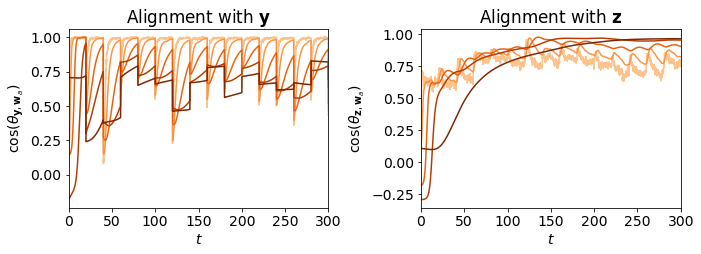

In [12]:
cm_section = np.linspace(0.3, 1, neurons[0].S)
colors = [ cm.Oranges(x) for x in cm_section ]

trunc_oranges = truncate_colormap(cm.Oranges, 0.3, 1)
log = neurons[0].logs[4]

fig3, axs3 = plt.subplots(1, 2, squeeze=True, figsize=(10,3.75))

for k in range(neurons[0].S):
    axs3[0].plot(
        log.timeline,
        (log.W[:, [k], :] @ log.y / np.sqrt(log.W[:, [k], :] @ np.transpose(log.W[:, [k], :], (0,2,1)))).squeeze(),
        color = colors[k],
        label = '$\mathbf{{w}}_{{{k}}}$'.format(k=k+1)        
    )

axs3[0].set_xlim(0, 0.6 * T)
axs3[0].set_xlabel('$t$')
axs3[0].set_ylabel('$\cos(\\theta_{{\mathbf{{y}},\mathbf{{w}}_{{a}}}})$')
axs3[0].set_title('Alignment with $\mathbf{{y}}$')

for k in range(neurons[0].S):
    axs3[1].plot(
        log.timeline,
        (log.W[:, [k], :] @ log.z / np.sqrt(log.W[:, [k], :] @ np.transpose(log.W[:, [k], :], (0,2,1)))).squeeze(),
        color = colors[k],
        label = '$\mathbf{{w}}_{{{k}}}$'.format(k=k+1)        
    )
axs3[1].set_xlim(0, 0.6 * T)
axs3[1].set_xlabel('$t$')
axs3[1].set_ylabel('$\cos(\\theta_{{\mathbf{{z}},\mathbf{{w}}_{{a}}}})$')
axs3[1].set_title('Alignment with $\mathbf{{z}}$')
# axs3[1].legend()

fig3.tight_layout()

In [10]:
fig3.savefig('../pre_figure/w_y_z_compare.pdf', bbox_inches = 'tight')

[(0.9921568627450981, 0.7644444444444445, 0.5524029219530949, 1.0), (0.9921568627450981, 0.5793310265282584, 0.272879661668589, 1.0), (0.9255363321799308, 0.3848673587081891, 0.05983852364475202, 1.0), (0.7270588235294118, 0.2386159169550173, 0.008781237985390234, 1.0), (0.4980392156862745, 0.15294117647058825, 0.01568627450980392, 1.0)]


Text(0.5, 1.0, '$\\mathbf{{W}}$')

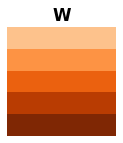

In [62]:
fig4, axs4 = plt.subplots(figsize=(2,2))
cm_section = np.linspace(0.3, 1, neurons[0].S)
colors = [ cm.Oranges(x) for x in cm_section ]

trunc_oranges = truncate_colormap(cm.Oranges, 0.3, 1)

print(colors)

axs4.imshow([[0], [1], [2], [3], [4]], cmap=trunc_oranges, aspect=0.2)
axs4.axis('off')
axs4.set_title('$\mathbf{{W}}$')

In [74]:
fig4.savefig('../pre_figure/legend.pdf', bbox_inches = 'tight')